In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [2]:
df = pd.read_excel('')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'student_performance_new.'

In [ ]:
df.isnull().sum()

In [ ]:
# handle outliers 
df.dropna(inplace=True)
# there is this extra space after the column names 
x = df.drop(['Sl.No. ',"USN ","Name ","Title ","Grade"],axis=1)
y = df.Grade

In [ ]:
x.head()
y

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Grade'])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)


In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)

feature_importances = pd.Series(rf.feature_importances_, index=x.columns).sort_values(ascending=False)
print(feature_importances)
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid correctly
param_grid = {
    'n_estimators': [100, 200, 300],  # Fixed key name
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]  # Fixed "min_samples_lear" typo
}

grid_search = GridSearchCV(estimator=rf, param_grid = param_grid, cv=5, n_jobs=1,verbose=2)

grid_search.fit(x_train,y_train)

In [ ]:
best_params = grid_search.best_params_
best_params

In [26]:
best_rf = RandomForestClassifier(random_state=42,**best_params)
best_rf.fit(x_train,y_train)
y_pred = best_rf.predict(x_test)

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, 
    classification_report
)


In [29]:
# Print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f" Accuracy: {accuracy:.4f}")
print(f" Precision: {precision:.4f}")
print(f" Recall: {recall:.4f}")
print(f" F1 Score: {f1:.4f}")

# Print classification report
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))


🔹 Accuracy: 0.6667
🔹 Precision: 0.6475
🔹 Recall: 0.6667
🔹 F1 Score: 0.6504

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.71      0.67        14
           1       0.67      0.40      0.50         5
           2       0.00      0.00      0.00         1
           3       0.71      0.77      0.74        13

    accuracy                           0.67        33
   macro avg       0.50      0.47      0.48        33
weighted avg       0.65      0.67      0.65        33



C:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

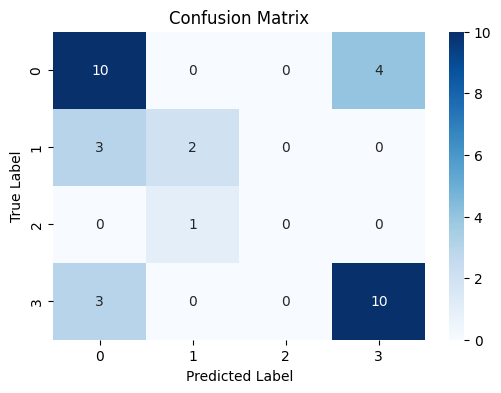

In [30]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
